# Keystrokes example
## Data preprocess

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2520 -58
5244 -499
2144 -375
8009 -317
2283 -9176
9680 -344
5695 -144
5509 -152
10865 -141
3780 -169


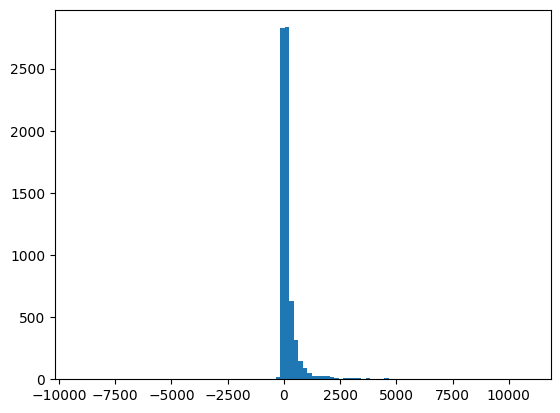

7160

In [40]:
ids = [27252, 36718, 56281, 64663, 67159, 97737, 145007, 159915, 264420, 271802]

inter_stroke_times = []
for id in ids:
    filename = "pn4874/%d_keystrokes.txt" % id

    df = pd.read_csv(filename, sep="\t")
    inter_stroke_time = np.array(df["PRESS_TIME"][1:])-np.array(df['RELEASE_TIME'][:-1])
    inter_stroke_times += inter_stroke_time.tolist()
    print(max(inter_stroke_time), min(inter_stroke_time))
plt.hist(inter_stroke_times, bins=100)
plt.show()
len(inter_stroke_times)

In [41]:
fname = "pn4874/inter_stroke_time.txt"
np.savetxt(fname, inter_stroke_times)

---

## Plot result

In [9]:
from scipy.interpolate import splev, splrep
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def draw_plots1D(generated, true, label):
        
    binsize = 2000        
    fig_scale = 3
    
    xlim = 15000
    
    # Scatter plot
    plt.figure(figsize=(fig_scale,fig_scale)) 
    plt.xscale('log')
    plt.yscale('log')
    h = plt.hist(true[:,0], alpha=0.9,cumulative=-1, density=True, bins=binsize, color='white')
    
    spl = splrep(h[1][1:], h[0], s=0.01, per=False)
    x2 = np.linspace(h[1][1], h[1][-1], 200)
    y2 = splev(x2, spl)
    plt.loglog(x2, y2, 'r-', linewidth=2.0, alpha=0.6, label='true')

    plt.hist(generated[:,0], label="generated", alpha=1.0 , cumulative=-1, density=True, bins=binsize, color = 'slategray')
    #plt.legend(fontsize=11, loc='lower left')   
    
    plt.xlim([1e-0, xlim])
    plt.ylim([1e-3, 1.0])
    plt.tight_layout()
    plt.savefig(f"./figures/{label}.png")
    plt.show()


alpha=02.00-Lip=1 GPA


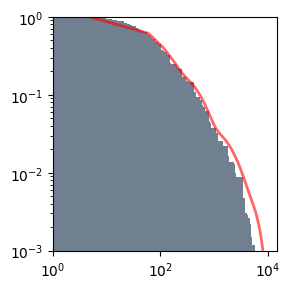

In [15]:
# GPA (Light to Heavy)

fs = ['alpha=02.00',]# 'reverse_KL', ]
#beta1 = 'infty'
#beta2 = df + d

for f in fs:
    if f in ['KL', 'reverse_KL']:
        alias_f = f + '=02.00'
    else:
        alias_f = f
    filename = "assets/Keystrokes/%s-Lipschitz_1.0000_7160_10000_00_3.pickle" % (alias_f)
    
    with open(filename, "rb") as fr:
        param, result = pickle.load(fr)
        
    print(f"{f}-Lip=1 GPA")
    draw_plots1D(np.abs(result['trajectories'][-1]), np.abs(param['X_']), f"Real {f}-Lip=1 GPA")



alpha=02.00-Lip=1 GPA


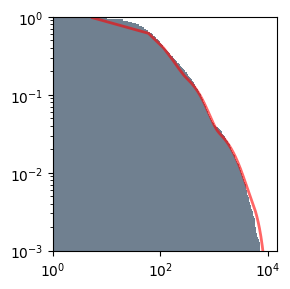

In [16]:
# GAN (Light to Heavy)

fs = ['alpha=02.00',]# 'reverse_KL', ]
#beta1 = 'infty'
#beta2 = df + d

for f in fs:
    if f in ['KL', 'reverse_KL']:
        alias_f = f + '=02.00'
    else:
        alias_f = f
    filename = "assets/Keystrokes/%s-Lipschitz_1.0000_GAN_df1.00_7160samples_0.pickle" % f

    
    with open(filename, "rb") as fr:
        [generated] = pickle.load(fr)
        
    print(f"{f}-Lip=1 GPA")
    draw_plots1D(np.abs(generated), np.abs(param['X_']), f"Real {f}-Lip=1 GAN")



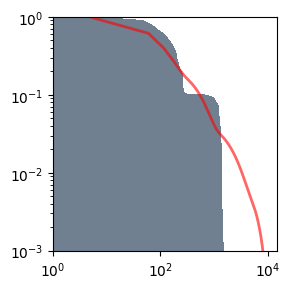

In [19]:
# OT flow
filename = "assets/Keystrokes/otflow_7160samples.pickle"
with open(filename, "rb") as fr:
    [normalized, generated] = pickle.load(fr)

draw_plots1D(np.abs(generated), np.abs(param['X_']), "Real OT flow T=50")


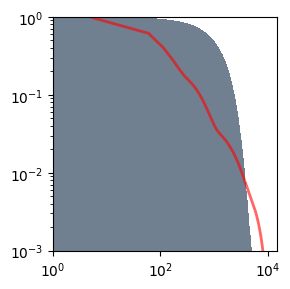

In [18]:
# VE SGM
filename = "assets/Keystrokes/ve_sgm_7160samples.pickle"
with open(filename, "rb") as fr:
    ou_normal, ou_reverse = pickle.load(fr)

draw_plots1D(np.abs(ou_reverse), np.abs(param['X_']), f"Real VE SGM")
